## Part A) ETL (Extract,Tramsform,Load) via S3 Bucket
## Part B) EDA (Exploratory Data Analysis) analysis 


Note: This is a mock dataset for testing purpose, you can generate a random dataset with the https://www.mockaroo.com/ according to your need.

Part A -Step 1: Connect the S3 Bucket using AWS Id and Seceret key

Note: I tested multiple dataset an found there is a range of delimeter (",","\t") etc in the dataset so everytime have to check or test the delimeter, to avoid this I used sniffer to get the delimeter and then read the csv,

In [666]:
# Method for EXtract DATA form S3 Bucket

def extract_data_viaS3Bucket(urls,aws_id,aws_secret,s3_bucket):
    
    try:
       
        import boto3
        import sys
        import csv
        import pandas as pd_aws


         

        session = boto3.Session( 
                aws_access_key_id=aws_id, 
                aws_secret_access_key=aws_secret)
        #Then use the session to get the resource

        s3 = session.resource('s3')
        my_bucket = s3.Bucket(s3_bucket)
        #its print the path-list of all files
        for my_bucket_object in my_bucket.objects.all():
            print("Path_List \n",my_bucket_object.key)
        
        

        if sys.version_info[0] < 3: 
            from StringIO import StringIO # Python 2.x
        else:
            from io import StringIO # Python 3.x
               
        client = boto3.client('s3', aws_access_key_id=aws_id,
                aws_secret_access_key=aws_secret)  
        csv_obj = client.get_object(Bucket=s3_bucket, Key=urls)
        body = csv_obj['Body']
        csv_string = body.read().decode('utf-8')
        
        sniffer = csv.Sniffer()
        dialect = sniffer.sniff(csv_string)
        delimeter_=dialect.delimiter   
        
        print('seperator is ',delimeter_)
        data_frame = pd_aws.read_csv(StringIO(csv_string),sep=delimeter_,header=0,engine = 'python',encoding='latin-1')
            
        return data_frame
        

    except NameError:
      
       print("OOPS,",NameError)

Note: Please replace your AWS ID, Secret key and bucket name, I have changed it for the security purpose. 
After getting the file from s3 bucket, you will see the first five rows of dataset to have general idea.

In [667]:
# STEP# 1:
# EXTRACT

import pandas as pd

path_URL='initial_Data/Cancer Patient Data.csv'


# You have to replace these Id's with yours
aws_id='AKIA**********'
aws_secret='dwy*****************************'
bucket_name='baskit***********'




data=extract_data_viaS3Bucket(path_URL,aws_id,aws_secret,bucket_name)
data.head(5)







Path_List 
 Final_Data/
Path_List 
 Final_Data/Transformed_data_v1.csv
Path_List 
 RanaD/
Path_List 
 RanaD/Air_Traffic_Landings_Statistics.csv
Path_List 
 RanaD/Air_Traffic_Passenger_Statistics.csv
Path_List 
 RanaD/Bad_Sample_out.csv
Path_List 
 RanaD/Cancer Patient Data Original.csv
Path_List 
 RanaD/Cancer Patient Data.csv
Path_List 
 RanaD/vgsales.csv
Path_List 
 initial_Data/
Path_List 
 initial_Data/Cancer Patient Data.csv
seperator is  ,


,Unnamed: 0,first name,last name,EMAIL,Unnamed: 4,gender,111,!@#$%^&*()%age,City,Country,...,metastasis,treatment_start_date,treatment_end_date,treatment_type,survival_status,survival_months,family_history,smoking_status,alcohol_consumption,diet
0,1.0,Revkah,Roseveare,rroseveare0@macromedia.com,1,Female,1,53.0,New York City,United States,...,True,18-Aug-09,05-Oct-01,surgery,alive,19.87,False,former smoker,occasionally,vegetarian
1,2.0,Drucill,McAline,dmcaline1@histats.com,2,Female,2,101.0,Newmarket,Canada,...,True,13-Feb-04,24-Jan-13,surgery,deceased,87.85,False,current smoker,regularly,omnivore
2,3.0,Tabbitha,Warstall,twarstall2@geocities.com,3,Female,3,54.0,Johnson City,United States,...,True,04-Apr-16,27-Jul-13,radiation therapy,deceased,57.83,False,former smoker,never,omnivore
3,4.0,Leelah,Donaho,ldonaho3@nps.gov,4,Polygender,4,91.0,Oklahoma City,United States,...,True,17-Apr-07,21-Nov-20,radiation therapy,deceased,57.06,False,current smoker,regularly,vegetarian
4,5.0,Kalle,Gwatkin,kgwatkin4@symantec.com,5,Male,5,70.0,Washington,United States,...,False,30-Oct-07,21-Sep-06,radiation therapy,deceased,119.75,False,never smoked,regularly,vegan


#Part A -Step 2: Transform (Data Wrangling/Cleaning, common data Transformation OR Applying Buissness Rules)

Lets start with the column fixation process as there is huge exceptional cases e.g. special characters, unnammed columns, Numeric column name, Spaces in column's names etc. 
 
Note: I intentially added these impurities in the dataset as faced these problems while column fixation process.

In [668]:

import pandas as pd_T
col_DF=pd_T.DataFrame(columns=['Columns_Before','Columns_After_Transform'])
print('Before',data.columns)
col_before=data.columns
col_DF['Columns_Before']=col_before
col_DF


Before Index(['Unnamed: 0', 'first name', 'last name', '       EMAIL', 'Unnamed: 4',
       '           gender  ', '111', '!@#$%^&*()%age', 'City', 'Country',
       'diagnosis_date', 'tumor_size', 'tumor_grade', 'lymph_node_status',
       'metastasis', 'treatment_start_date', 'treatment_end_date',
       'treatment_type', 'survival_status', 'survival_months',
       'family_history', 'smoking_status', 'alcohol_consumption', 'diet'],
      dtype='object')


,Columns_Before,Columns_After_Transform
0,Unnamed: 0,NaN
1,first name,NaN
2,last name,NaN
3,EMAIL,NaN
4,Unnamed: 4,NaN
5,gender,NaN
6,111,NaN
7,!@#$%^&*()%age,NaN
8,City,NaN
9,Country,NaN


Method to fix the column names, e.g. Names as Title, extra spaces issues, removing special characters, handling numeric column names, dealing witht he unnammed columns etc.

Note: Its a generic function so will work with every kind of dataset, just need to pass the dataframe as argument.

In [669]:
def fix_Columns(data):
    #Column Fixer
    #Lower Case the Columns
    data.columns = data.columns.map(str.casefold)
    #Column's naming convention as Title 
    data.columns = data.columns.str.title()

    # remove all the leading (spaces at the beginning) and trailing (spaces at the end)
    data.columns = data.columns.str.strip()

    # data.columns = data.columns.str.replace('', '_')

    #replace the special characters or hyphen with underscore:
    # data.columns = data.columns.str.replace('[-!*&#%^()$@/;:<>{}+=~|"?,.]', '_')

    # remove non-word characters
    data.columns = data.columns.str.replace('\W', '', regex=True)

    #for very bad dataSets
    # data.columns = ["Col_"+str(i) if a == "" else a for i, a in enumerate(data.columns)]

    data.columns = ["Col_"+str(a) if a.isnumeric()  else a for i, a in enumerate(data.columns)]

    data.columns = ["Column_"+str(i) if 'Unnamed' in a  else a for i, a in enumerate(data.columns)]



    col_after_Fix=data.columns
    col_DF['Columns_After_Transform']=col_after_Fix


    # data.columns = data.columns.map(lambda x : "Col_" + x) 
    # print('After_Col_Fixation',data.columns)
    # data.head(3)

    # col_DF

    return data


See the dataframe with the before and after transformation column after column fixation process.
Column Fixation part the completed there.

In [670]:
T_cols=fix_Columns(data)
col_DF






,Columns_Before,Columns_After_Transform
0,Unnamed: 0,Column_0
1,first name,FirstName
2,last name,LastName
3,EMAIL,Email
4,Unnamed: 4,Column_4
5,gender,Gender
6,111,Col_111
7,!@#$%^&*()%age,Age
8,City,City
9,Country,Country


Now our transformed data is in the T_cols dataframe.

In [671]:
T_cols.head(5)

,Column_0,FirstName,LastName,Email,Column_4,Gender,Col_111,Age,City,Country,...,Metastasis,Treatment_Start_Date,Treatment_End_Date,Treatment_Type,Survival_Status,Survival_Months,Family_History,Smoking_Status,Alcohol_Consumption,Diet
0,1.0,Revkah,Roseveare,rroseveare0@macromedia.com,1,Female,1,53.0,New York City,United States,...,True,18-Aug-09,05-Oct-01,surgery,alive,19.87,False,former smoker,occasionally,vegetarian
1,2.0,Drucill,McAline,dmcaline1@histats.com,2,Female,2,101.0,Newmarket,Canada,...,True,13-Feb-04,24-Jan-13,surgery,deceased,87.85,False,current smoker,regularly,omnivore
2,3.0,Tabbitha,Warstall,twarstall2@geocities.com,3,Female,3,54.0,Johnson City,United States,...,True,04-Apr-16,27-Jul-13,radiation therapy,deceased,57.83,False,former smoker,never,omnivore
3,4.0,Leelah,Donaho,ldonaho3@nps.gov,4,Polygender,4,91.0,Oklahoma City,United States,...,True,17-Apr-07,21-Nov-20,radiation therapy,deceased,57.06,False,current smoker,regularly,vegetarian
4,5.0,Kalle,Gwatkin,kgwatkin4@symantec.com,5,Male,5,70.0,Washington,United States,...,False,30-Oct-07,21-Sep-06,radiation therapy,deceased,119.75,False,never smoked,regularly,vegan


Part A -Step 3 Lets fix the column dataTypes
It is clearly seen in the dataframe that date related columns were with the String DataType.

In [672]:
#Column's DataType Fixer
import numpy as np

df2=pd_T.DataFrame(columns=['Columns','DataType_Before','DataType_After'])
df2['Columns']=T_cols.columns
T_cols=T_cols.convert_dtypes()
df2['DataType_Before']=T_cols.dtypes.to_list()


T_cols['Diagnosis_Date']=pd_T.to_datetime(T_cols['Diagnosis_Date'],errors='coerce')
T_cols['Treatment_Start_Date']=pd_T.to_datetime(T_cols['Diagnosis_Date'],errors='coerce')
T_cols['Treatment_End_Date']=pd_T.to_datetime(T_cols['Diagnosis_Date'],errors='coerce')
df2['DataType_After']= T_cols.dtypes.to_list()
df2

,Columns,DataType_Before,DataType_After
0,Column_0,Int64,Int64
1,FirstName,string,string
2,LastName,string,string
3,Email,string,string
4,Column_4,Int64,Int64
5,Gender,string,string
6,Col_111,Int64,Int64
7,Age,Int64,Int64
8,City,string,string
9,Country,string,string


# Now Lets Deep Dive the Data
Part A -Step 4 (Dealing wiht the missing values,Duplicate data,)

4a) Exploring the data dimensions and  deleting duplicate rows

In [673]:
print("There are ",T_cols.shape[0], 'and ',T_cols.shape[1],' columns.')

duplicate_count=T_cols.duplicated().sum()
print('Out of ',T_cols.shape[0],' rows,  ',duplicate_count,' rows are duplicates.')

#Drop Duplicate Rows
T_cols=T_cols.drop_duplicates()
print('After deleteing duplicate rows, pending rows are',T_cols.shape[0])


There are  1003 and  24  columns.
Out of  1003  rows,   2  rows are duplicates.
After deleteing duplicate rows, pending rows are 1001


4b) Observe the data with null/non-null and unique values to understand categorical and non-categorical columns.Categorical can be useful for the classification problems. 
Note: The null-values count explains the empty or missing data in each column to understand the columns.

In [674]:

df2['Non_Null_Values']=T_cols.notnull().sum().to_list()
df2['Null_Values']=T_cols.isnull().sum().to_list()
df2['Unique_values']=T_cols.nunique().to_list()

categ_thresh=10
df2['Column_Type']= np.where( (df2['Unique_values']/df2['Non_Null_Values']) * 100 <= categ_thresh, 'Categorical','Non-Categorical') 

df2


,Columns,DataType_Before,DataType_After,Non_Null_Values,Null_Values,Unique_values,Column_Type
0,Column_0,Int64,Int64,994,7,993,Non-Categorical
1,FirstName,string,string,1001,0,941,Non-Categorical
2,LastName,string,string,926,75,906,Non-Categorical
3,Email,string,string,927,74,926,Non-Categorical
4,Column_4,Int64,Int64,1001,0,1000,Non-Categorical
5,Gender,string,string,988,13,8,Categorical
6,Col_111,Int64,Int64,1001,0,1000,Non-Categorical
7,Age,Int64,Int64,857,144,123,Non-Categorical
8,City,string,string,1000,1,516,Non-Categorical
9,Country,string,string,1000,1,4,Categorical


4c) Dealing with missing values is one of the most important and tricky part to do with the dataset.Normally, people delete the null rows and work with the rest of the dataset but in most cases there is organisation defined rules to deals with missing values, e.g Constant values or new feature column etc.

There are several options disscussed below.

In [675]:
# Option 1: Drop missing values
# T_cols = T_cols.dropna()


# Option 2 : Impute the Mission Values
# You can use various imputation techniques, such as mean, median, mode, or advanced methods like regression imputation or K-nearest neighbors imputation.



# Assuming 'T_cols' is your DataFrame with missing values
columns_to_impute = ['Gender','Country','Tumor_Grade','Lymph_Node_Status','Metastasis','Treatment_Type','Survival_Status','Family_History','Smoking_Status','Alcohol_Consumption','Diet']  
# fill null with most repeated values
T_cols[columns_to_impute] = T_cols[columns_to_impute].fillna(T_cols[columns_to_impute].mode().iloc[0])



date_columns_to_impute=['Diagnosis_Date','Treatment_Start_Date','Treatment_End_Date']
# Assuming 'data' is your DataFrame with missing date values
T_cols[date_columns_to_impute] = T_cols[date_columns_to_impute].fillna(method='ffill')  # Forward fill



special_columns_to_impute=['LastName','Email','City']
 #For email or country related columns I used "Missing" keyword to save the data
T_cols[special_columns_to_impute] = T_cols[special_columns_to_impute].fillna('Missing')




numeric_columns_to_impute=['Column_0','Age','Survival_Months']
 #For email or country related columns I used "Missing" keyword to save the data
T_cols[numeric_columns_to_impute] = T_cols[numeric_columns_to_impute].fillna(round(T_cols[numeric_columns_to_impute].median()))



T_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Column_0              1001 non-null   Int64         
 1   FirstName             1001 non-null   string        
 2   LastName              1001 non-null   string        
 3   Email                 1001 non-null   string        
 4   Column_4              1001 non-null   Int64         
 5   Gender                1001 non-null   string        
 6   Col_111               1001 non-null   Int64         
 7   Age                   1001 non-null   Int64         
 8   City                  1001 non-null   string        
 9   Country               1001 non-null   string        
 10  Diagnosis_Date        1001 non-null   datetime64[ns]
 11  Tumor_Size            1001 non-null   Float64       
 12  Tumor_Grade           1001 non-null   Int64         
 13  Lymph_Node_Status 

4d) Highlight Outliers and imputate them with multiple techniques

1) Via Box-Plot Method:

'Age' is the column name and you can see there is three outliers showing above max whisker.

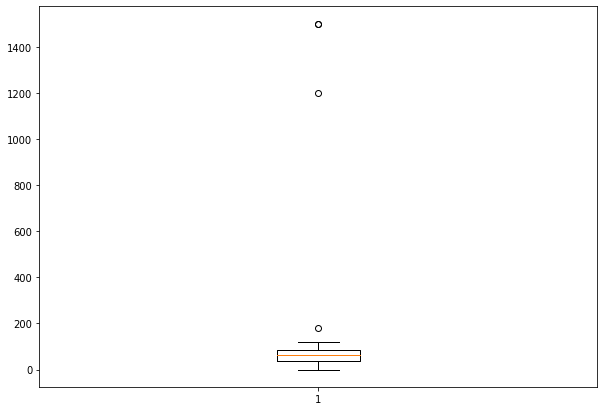

In [676]:

# Import libraries
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
data=T_cols['Age']
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()


2) Via  Scatter Plot 
I used 'Tumor_Size' column.

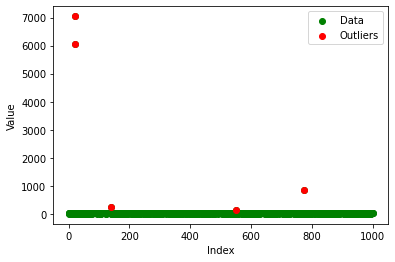

In [677]:
# outliers example

import numpy as np
import matplotlib.pyplot as plt

data=T_cols['Tumor_Size']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
plt.scatter(range(len(data)), data, color='Green', label='Data')
plt.scatter(outliers, data[outliers], color='Red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


3.Via Histogram

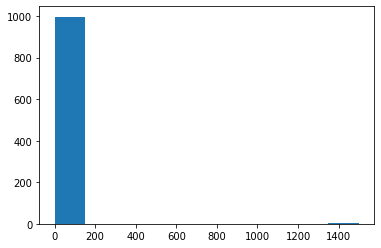

In [678]:
import matplotlib.pyplot as plt


# Create a histogram
plt.hist(T_cols['Age'])
# Display the plot
plt.show()

4.Fixing outlier with Interquartile range -IQR method

Note: Outliers are can be fixed using multiple ways depending on the various factors e.g data distribution etc.
Mean,Mode,Median, Forward-fill, Backward-fill, Value-Capping are some usefull examples but there are more to explore.

In [679]:
# Fixing outlier with IQR method

def fix_outliers(df,cols_to_fix):
    
    import numpy as n_p
    outlier_df=pd.DataFrame(columns=['Columns','Outliers_Before_Fixation'])
    # print(cols_to_fix)
    outlier_df['Columns']=cols_to_fix.columns.to_list()
    cols_to_fix=cols_to_fix.columns.to_list()
    q1=df[cols_to_fix].quantile(0.25)
    q3=df[cols_to_fix].quantile(0.75)
        
    IQR=q3-q1

   

   # Identify outliers for the selected columns
    outliers = (df[cols_to_fix] < (q1 - 1.5*IQR)) | (df[cols_to_fix] > (q3 + 1.5*IQR))
    outliers_count = outliers.sum()
    outlier_df['Outliers_Before_Fixation']=outliers_count.to_list()
    


#Approach 1A:
    # Replace outliers with the specified boundaries
    df[cols_to_fix] = n_p.where(outliers, n_p.nan, df[cols_to_fix])
    
    #This is middle value
    df[cols_to_fix] =  df[cols_to_fix].fillna(round(df[cols_to_fix].median()))

    # #This is Mean average value
    # df[cols_to_fix] =  df[cols_to_fix].fillna(round(df[cols_to_fix].mean()))


 # Approach 2:
    # df[cols_to_fix] = n_p.where(  (df[cols_to_fix]  < (q1)) , q1,df[cols_to_fix])
    # df[cols_to_fix] = n_p.where(  (df[cols_to_fix]  > (q3))  , q3,df[cols_to_fix])


    
    

    # agian Check the outliers this
    # Identify outliers for the selected columns
    outliers = (df[cols_to_fix] < (q1 - 1.5*IQR)) | (df[cols_to_fix] > (q3 + 1.5*IQR))
    outliers_count = outliers.sum()
    outlier_df['Outliers_After_Fixation']=outliers_count.to_list()
    
    return df,outlier_df


Include only numeric values for outlier detection.

In [680]:
cols_to_fix=T_cols.select_dtypes(include='number')
fixed_df,outliers_details= fix_outliers(T_cols,cols_to_fix)
outliers_details

,Columns,Outliers_Before_Fixation,Outliers_After_Fixation
0,Column_0,0,0
1,Column_4,0,0
2,Col_111,0,0
3,Age,4,0
4,Tumor_Size,5,0
5,Tumor_Grade,0,0
6,Survival_Months,2,0


## Note: Data is ready to use for further analysis depending upon the problem statement that needs to be figure out.

In [681]:
#by default it shows first 5 rows
fixed_df.head()

,Column_0,FirstName,LastName,Email,Column_4,Gender,Col_111,Age,City,Country,...,Metastasis,Treatment_Start_Date,Treatment_End_Date,Treatment_Type,Survival_Status,Survival_Months,Family_History,Smoking_Status,Alcohol_Consumption,Diet
0,1,Revkah,Roseveare,rroseveare0@macromedia.com,1,Female,1,53.0,New York City,United States,...,True,2001-05-26,2001-05-26,surgery,alive,19.87,False,former smoker,occasionally,vegetarian
1,2,Drucill,McAline,dmcaline1@histats.com,2,Female,2,101.0,Newmarket,Canada,...,True,2002-04-24,2002-04-24,surgery,deceased,87.85,False,current smoker,regularly,omnivore
2,3,Tabbitha,Warstall,twarstall2@geocities.com,3,Female,3,54.0,Johnson City,United States,...,True,2001-07-13,2001-07-13,radiation therapy,deceased,57.83,False,former smoker,never,omnivore
3,4,Leelah,Donaho,ldonaho3@nps.gov,4,Polygender,4,91.0,Oklahoma City,United States,...,True,2017-06-30,2017-06-30,radiation therapy,deceased,57.06,False,current smoker,regularly,vegetarian
4,5,Kalle,Gwatkin,kgwatkin4@symantec.com,5,Male,5,70.0,Washington,United States,...,False,2008-08-23,2008-08-23,radiation therapy,deceased,119.75,False,never smoked,regularly,vegan


In [682]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Column_0              1001 non-null   int64         
 1   FirstName             1001 non-null   string        
 2   LastName              1001 non-null   string        
 3   Email                 1001 non-null   string        
 4   Column_4              1001 non-null   int64         
 5   Gender                1001 non-null   string        
 6   Col_111               1001 non-null   int64         
 7   Age                   1001 non-null   float64       
 8   City                  1001 non-null   string        
 9   Country               1001 non-null   string        
 10  Diagnosis_Date        1001 non-null   datetime64[ns]
 11  Tumor_Size            1001 non-null   float64       
 12  Tumor_Grade           1001 non-null   int64         
 13  Lymph_Node_Status 

# Load -Save the clean transformed file to S3 Bucket

Save the data in to local directory

In [683]:
import os  
path_='F:\Rana work\Exploratory-Data-Analysis-EDA-'+"/Datasets/"
os.makedirs(path_, exist_ok=True)  
fixed_df.to_csv(path_ +'Transformed_data.csv') 


Now upload the saved csv file to S3 bucket for further analysis e.g. Machine learning and make it avaialbe for other's team members to work on.

In [684]:
import boto3
# aws_id,aws_secret,bucket_name
from botocore.exceptions import NoCredentialsError
def upload_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3', aws_access_key_id=aws_id,
                      aws_secret_access_key=aws_secret)

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False


# uploaded = upload_to_aws('local_file', 'bucket_name', 's3_file_name')








Note: Double check the folder directory in S3 Bucket and Local directory.

In [685]:


uploaded = upload_to_aws(path_ +'Transformed_data.csv', bucket_name, 'Final_Data/'+ 'Transformed_data_v1.csv')

Upload Successful


## Part B) EDA (Exploratory Data Analysis) analysis 

Note: For exploratory data analysis some common steps have already done, and can be seen on above sheet. E.g. Data information, Duplicate rows, Column Fixation, Imputing missing values, Dealing with outliers etc.

In [686]:
df_num=fixed_df.select_dtypes(include='number')

df_trans=df_num.describe()
df_trans.transpose()



,count,mean,std,min,25%,50%,75%,max
Column_0,1001.0,504.447552,286.162456,1.00,258.00,504.00,751.00,1000.00
Column_4,1001.0,500.999001,289.106384,1.00,251.00,501.00,751.00,1000.00
Col_111,1001.0,500.999001,289.106384,1.00,251.00,501.00,751.00,1000.00
Age,1001.0,60.865135,31.313173,0.00,37.00,62.00,83.00,120.00
Tumor_Size,1001.0,25.289241,14.180805,0.02,13.35,25.87,37.22,49.93
Tumor_Grade,1001.0,2.506494,1.099185,1.00,2.00,2.00,3.00,4.00
Survival_Months,1001.0,61.356114,34.970683,0.05,31.45,62.89,90.39,119.97


This is the descriptive analysis and very helpfull to understand the dataset performance, for example Standard Deveiation,	COV,	Kurtosis,	Skewness,	Mean,	Median_Absolute_Deviation,	Sum and Variance etc.

In [687]:

   
def descriptive_analysis(df_num):

   col_to_perform=df_num.select_dtypes(include='number')

   df_Descriptive=pd_T.DataFrame(index =['Std_Dev', 'COV', 'Kurtosis', 'Skewness', 'Mean','Median_Absolute_Deviation', 
                                       'Sum', 'Variance'],columns=col_to_perform.columns.to_list()) 
   df_Descriptive=df_Descriptive.transpose()
   df_Descriptive

   mad_list=col_to_perform.mad().to_list()
   if len(mad_list) > 0:
      print('df0: \n',mad_list[0])

   for i, val in enumerate(col_to_perform):
         
         df_Descriptive.loc[''+str(val), "Std_Dev"] = "{0:.2f}".format(col_to_perform[''+str(val)].std()) 
         
         cov_df = col_to_perform[''+str(val)].std() / col_to_perform[''+str(val)].mean()
         df_Descriptive.loc[''+str(val), "COV"] = "{0:.2f}".format(cov_df)



         df_Descriptive.loc[''+str(val), "Kurtosis"] = "{0:.2f}".format(col_to_perform[''+str(val)].kurtosis())
         df_Descriptive.loc[''+str(val), "Skewness"] = "{0:.2f}".format(col_to_perform[''+str(val)].skew())
         df_Descriptive.loc[''+str(val), "Mean"] = "{0:.2f}".format(col_to_perform[''+str(val)].mean())
         
         df_Descriptive.loc[''+str(val), "Median_Absolute_Deviation"] ="{0:.2f}".format(mad_list[i]) 
         
         df_Descriptive.loc[''+str(val), "Sum"] = "{0:.2f}".format(col_to_perform[''+str(val)].sum())
         df_Descriptive.loc[''+str(val), "Variance"] = "{0:.2f}".format(col_to_perform[''+str(val)].var())
         
         df_Descriptive=df_Descriptive.round(2)

   
   return df_Descriptive

In [688]:
df_des=descriptive_analysis(fixed_df)
df_des

df0: 
 246.8123205465854


,Std_Dev,COV,Kurtosis,Skewness,Mean,Median_Absolute_Deviation,Sum,Variance
Column_0,286.16,0.57,-1.19,-0.00,504.45,246.81,504952.00,81888.95
Column_4,289.11,0.58,-1.20,-0.00,501.00,250.25,501500.00,83582.50
Col_111,289.11,0.58,-1.20,-0.00,501.00,250.25,501500.00,83582.50
Age,31.31,0.51,-0.78,-0.06,60.87,24.83,60926.00,980.51
Tumor_Size,14.18,0.56,-1.15,-0.03,25.29,12.16,25314.53,201.10
Tumor_Grade,1.10,0.44,-1.32,0.02,2.51,0.98,2509.00,1.21
Survival_Months,34.97,0.57,-1.15,-0.08,61.36,29.98,61417.47,1222.95


For Quantile Analysis, I considered Min,Max,Range,50%,95%,1st quantile.3rd quantile, Median and IQR.

In [689]:
def quantile_analysis(df_num):

   col_to_perform=df_num.select_dtypes(include='number')

   df_quantile=pd_T.DataFrame(index =['Min', 'Max','Range', 'Fifty_perc', 'Ninetyfive_perc', '1st_qunt','3rd_qunt', 'Median', 'IQR']
                                 ,columns=col_to_perform.columns.to_list()) 
   df_quantile=df_quantile.transpose()
   df_quantile

   

   for i, val in enumerate(col_to_perform):
         
      df_quantile.loc[''+str(val), "Min"] = "{0:.2f}".format(col_to_perform[''+str(val)].min())
      df_quantile.loc[''+str(val), "Max"] = "{0:.2f}".format(col_to_perform[''+str(val)].max())

      range_df=col_to_perform[''+str(val)].max()-col_to_perform[''+str(val)].min()
      df_quantile.loc[''+str(val), "Range"] = "{0:.2f}".format(range_df)

      df_quantile.loc[''+str(val), "Fifty_perc"] = "{0:.2f}".format(col_to_perform[''+str(val)].quantile(q=0.5))
      df_quantile.loc[''+str(val), "Ninetyfive_perc"] = "{0:.2f}".format(col_to_perform[''+str(val)].quantile(q=0.95))
      df_quantile.loc[''+str(val), "1st_qunt"] ="{0:.2f}".format(col_to_perform[''+str(val)].quantile(q=0.01)) 
      df_quantile.loc[''+str(val), "3rd_qunt"] ="{0:.2f}".format(col_to_perform[''+str(val)].quantile(q=0.03)) 
      df_quantile.loc[''+str(val), "Median"] = "{0:.2f}".format(col_to_perform[''+str(val)].median())


      IQR = col_to_perform[''+str(val)].quantile(0.75) - col_to_perform[''+str(val)].quantile(0.25)
      # print("IQR",IQR)
      df_quantile.loc[''+str(val), "IQR"] = "{0:.2f}".format(IQR)




      df_quantile=df_quantile.round(2)

   
   return df_quantile

Quantile Analysis is also very usefull for understanding the data.

In [690]:
quantile_analysis(fixed_df)


,Min,Max,Range,Fifty_perc,Ninetyfive_perc,1st_qunt,3rd_qunt,Median,IQR
Column_0,1.00,1000.00,999.00,504.00,951.00,18.00,38.00,504.00,493.00
Column_4,1.00,1000.00,999.00,501.00,951.00,11.00,31.00,501.00,500.00
Col_111,1.00,1000.00,999.00,501.00,951.00,11.00,31.00,501.00,500.00
Age,0.00,120.00,120.00,62.00,112.00,1.00,4.00,62.00,46.00
Tumor_Size,0.02,49.93,49.91,25.87,47.01,0.59,1.63,25.87,23.87
Tumor_Grade,1.00,4.00,3.00,2.00,4.00,1.00,1.00,2.00,1.00
Survival_Months,0.05,119.97,119.92,62.89,115.01,0.95,2.88,62.89,58.94


# Lets start the Correlational Analysis Via Pearson,Kendall and Spearman

Note: Its a relationship between the variables and value can be vary from -1 to 1. Any value greater than '0' and close to '1' means its a direct realtion between two variables and if its less than '0' and close to '-1' then its a inverse relation between variables. 



In [691]:
corr_Pearson=fixed_df.corr(method ='pearson')
corr_Pearson=corr_Pearson.round(2)
corr_Pearson





,Column_0,Column_4,Col_111,Age,Tumor_Size,Tumor_Grade,Metastasis,Survival_Months,Family_History
Column_0,1.00,0.99,0.99,-0.01,0.01,-0.00,-0.01,0.02,-0.01
Column_4,0.99,1.00,1.00,0.00,0.01,0.00,-0.02,0.01,-0.01
Col_111,0.99,1.00,1.00,0.00,0.01,0.00,-0.02,0.01,-0.01
Age,-0.01,0.00,0.00,1.00,-0.01,0.05,0.01,-0.00,0.02
Tumor_Size,0.01,0.01,0.01,-0.01,1.00,0.04,0.02,-0.02,-0.04
Tumor_Grade,-0.00,0.00,0.00,0.05,0.04,1.00,0.00,0.05,0.05
Metastasis,-0.01,-0.02,-0.02,0.01,0.02,0.00,1.00,0.03,-0.02
Survival_Months,0.02,0.01,0.01,-0.00,-0.02,0.05,0.03,1.00,-0.04
Family_History,-0.01,-0.01,-0.01,0.02,-0.04,0.05,-0.02,-0.04,1.00


Lets see the example 'Column_0' Vs 'Column_4', but the problem is it was the unammed columns so might be ignore one of them or do Feature selection or Transformation etc.

Note: Ignore the values of same columns e.g. 'Age' Vs 'Age' or 'Column_0' Vs 'Column_0' etc

Text(0, 0.5, 'Column_4')

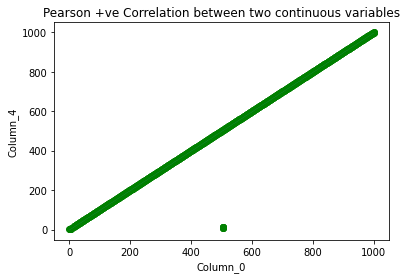

In [692]:

import matplotlib.pyplot as plt_pear
x=fixed_df['Column_0']
x=np.array(x).astype(float)
y=fixed_df['Column_4']
y=np.array(y).astype(float)

plt_pear.scatter(x, y,color='green')

# plt_pear.scatter(x, y,alpha=0.5,color='red')

    #find line of best fit
a,b = np.polyfit(x, y, 1)

#add line of best fit to plot
#  '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt_pear.plot(x, a*x+b, color='steelblue', linestyle='dashed', linewidth=0.2)
plt_pear.title('Pearson +ve Correlation between two continuous variables')
plt_pear.xlabel('Column_0')
plt_pear.ylabel('Column_4')

There are other options e.g. Kendal or Spearman to find out relationship between variables without assuming a specific distribution or linearity.

In [693]:
corr_ken=fixed_df.corr(method ='kendall')
corr_ken=corr_ken.round(2)
corr_ken

,Column_0,Column_4,Col_111,Age,Tumor_Size,Tumor_Grade,Metastasis,Survival_Months,Family_History
Column_0,1.00,0.99,0.99,-0.00,0.01,-0.00,-0.01,0.01,-0.01
Column_4,0.99,1.00,1.00,0.01,0.01,0.00,-0.01,0.01,-0.01
Col_111,0.99,1.00,1.00,0.01,0.01,0.00,-0.01,0.01,-0.01
Age,-0.00,0.01,0.01,1.00,-0.00,0.04,0.01,0.00,0.01
Tumor_Size,0.01,0.01,0.01,-0.00,1.00,0.03,0.02,-0.02,-0.03
Tumor_Grade,-0.00,0.00,0.00,0.04,0.03,1.00,0.00,0.03,0.04
Metastasis,-0.01,-0.01,-0.01,0.01,0.02,0.00,1.00,0.02,-0.02
Survival_Months,0.01,0.01,0.01,0.00,-0.02,0.03,0.02,1.00,-0.03
Family_History,-0.01,-0.01,-0.01,0.01,-0.03,0.04,-0.02,-0.03,1.00


In [694]:

corr_spear=fixed_df.corr(method ='spearman')
corr_spear=corr_spear.round(2)
corr_spear

,Column_0,Column_4,Col_111,Age,Tumor_Size,Tumor_Grade,Metastasis,Survival_Months,Family_History
Column_0,1.00,0.99,0.99,-0.00,0.01,-0.00,-0.01,0.02,-0.02
Column_4,0.99,1.00,1.00,0.00,0.01,0.00,-0.02,0.01,-0.01
Col_111,0.99,1.00,1.00,0.00,0.01,0.00,-0.02,0.01,-0.01
Age,-0.00,0.00,0.00,1.00,-0.00,0.05,0.02,0.00,0.01
Tumor_Size,0.01,0.01,0.01,-0.00,1.00,0.04,0.02,-0.02,-0.04
Tumor_Grade,-0.00,0.00,0.00,0.05,0.04,1.00,0.00,0.05,0.04
Metastasis,-0.01,-0.02,-0.02,0.02,0.02,0.00,1.00,0.03,-0.02
Survival_Months,0.02,0.01,0.01,0.00,-0.02,0.05,0.03,1.00,-0.04
Family_History,-0.02,-0.01,-0.01,0.01,-0.04,0.04,-0.02,-0.04,1.00


# Some examples using Seanborn library

In [695]:
import seaborn as sns
import matplotlib.pyplot as plt


Univariant Analysis - Understanding the individual Column

<AxesSubplot:xlabel='Survival_Months'>

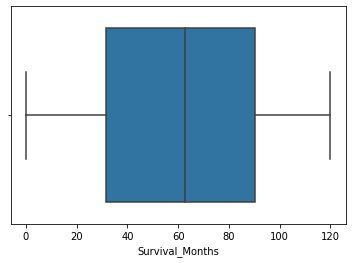

In [696]:
# # Histogram
# sns.histplot(data=fixed_df, x='Treatment_Start_Date')

# # Kernel Density Estimate (KDE) plot
# sns.kdeplot(data=fixed_df, x='Age')

# # Box plot
sns.boxplot(data=fixed_df, x='Survival_Months')

Bivariate Analysis: Relationship between two or multiple columns

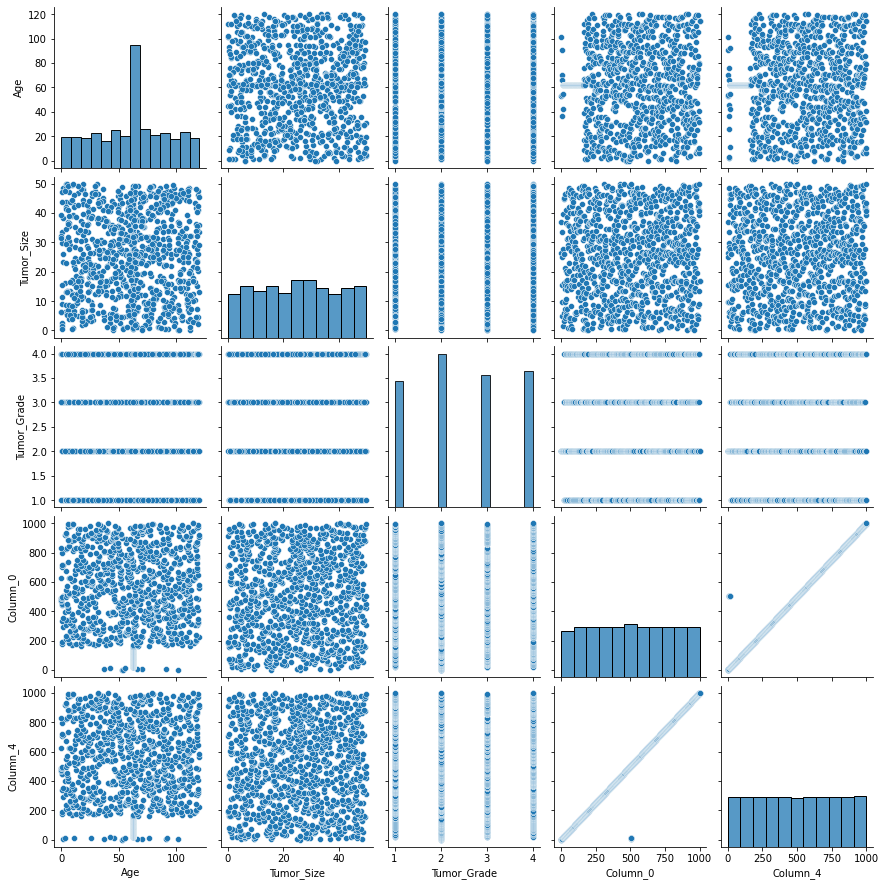

In [697]:
# Scatter plot
# sns.scatterplot(data=fixed_df, x='Column_0', y='Column_4')

# # Pair plot (multiple scatter plots)
sns.pairplot(data=fixed_df[['Age', 'Tumor_Size', 'Tumor_Grade','Column_0','Column_4']])

Categorical Analysis

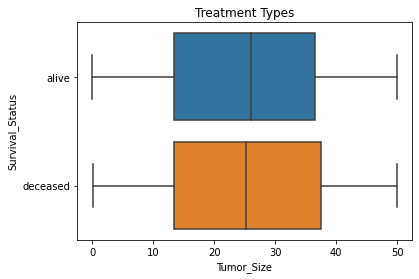

In [698]:
# Bar plot

# sns.countplot(data=fixed_df, x='Treatment_Type')

sns.boxplot(data=fixed_df, x='Tumor_Size', y='Survival_Status')

plt.title('Treatment Types')
plt.show()

In [699]:
corr_Pearson

,Column_0,Column_4,Col_111,Age,Tumor_Size,Tumor_Grade,Metastasis,Survival_Months,Family_History
Column_0,1.00,0.99,0.99,-0.01,0.01,-0.00,-0.01,0.02,-0.01
Column_4,0.99,1.00,1.00,0.00,0.01,0.00,-0.02,0.01,-0.01
Col_111,0.99,1.00,1.00,0.00,0.01,0.00,-0.02,0.01,-0.01
Age,-0.01,0.00,0.00,1.00,-0.01,0.05,0.01,-0.00,0.02
Tumor_Size,0.01,0.01,0.01,-0.01,1.00,0.04,0.02,-0.02,-0.04
Tumor_Grade,-0.00,0.00,0.00,0.05,0.04,1.00,0.00,0.05,0.05
Metastasis,-0.01,-0.02,-0.02,0.01,0.02,0.00,1.00,0.03,-0.02
Survival_Months,0.02,0.01,0.01,-0.00,-0.02,0.05,0.03,1.00,-0.04
Family_History,-0.01,-0.01,-0.01,0.02,-0.04,0.05,-0.02,-0.04,1.00


## Note: EDA analysis is completed. 
The next phase will be to create a report for EDA or highlight the problem statement and apply a machine learning algorithms wisely.

In [700]:
fixed_df.head(100)

,Column_0,FirstName,LastName,Email,Column_4,Gender,Col_111,Age,City,Country,...,Metastasis,Treatment_Start_Date,Treatment_End_Date,Treatment_Type,Survival_Status,Survival_Months,Family_History,Smoking_Status,Alcohol_Consumption,Diet
0,1,Revkah,Roseveare,rroseveare0@macromedia.com,1,Female,1,53.0,New York City,United States,...,True,2001-05-26,2001-05-26,surgery,alive,19.87,False,former smoker,occasionally,vegetarian
1,2,Drucill,McAline,dmcaline1@histats.com,2,Female,2,101.0,Newmarket,Canada,...,True,2002-04-24,2002-04-24,surgery,deceased,87.85,False,current smoker,regularly,omnivore
2,3,Tabbitha,Warstall,twarstall2@geocities.com,3,Female,3,54.0,Johnson City,United States,...,True,2001-07-13,2001-07-13,radiation therapy,deceased,57.83,False,former smoker,never,omnivore
3,4,Leelah,Donaho,ldonaho3@nps.gov,4,Polygender,4,91.0,Oklahoma City,United States,...,True,2017-06-30,2017-06-30,radiation therapy,deceased,57.06,False,current smoker,regularly,vegetarian
4,5,Kalle,Gwatkin,kgwatkin4@symantec.com,5,Male,5,70.0,Washington,United States,...,False,2008-08-23,2008-08-23,radiation therapy,deceased,119.75,False,never smoked,regularly,vegan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Kaylee,Fosh,Missing,96,Female,96,62.0,Roberval,Canada,...,False,2009-07-08,2009-07-08,surgery,alive,69.36,False,former smoker,regularly,vegetarian
96,97,Alic,Robak,Missing,97,Male,97,62.0,Winter Haven,United States,...,False,2010-04-08,2010-04-08,radiation therapy,alive,17.77,False,former smoker,occasionally,omnivore
97,98,Melisent,Buckie,Missing,98,Female,98,62.0,El Paso,United States,...,True,2004-02-04,2004-02-04,surgery,deceased,83.96,True,current smoker,occasionally,omnivore
98,99,Bryant,Chomicki,Missing,99,Male,99,62.0,Collingwood,Canada,...,False,2020-06-19,2020-06-19,radiation therapy,alive,57.40,False,current smoker,occasionally,vegan


# Conclusion: 
In conclusion, the analysis reveals that there is no significant strong direct or inverse relationship between the columns in the dataset. It is worth noting that columns like Column_0, Column_4, or Col_111 exhibit a relatively stronger correlation, but due to the lack of informative metadata about these columns, it is challenging to determine their precise meaning or relevance. Consequently, performing feature selection or transformation based on these unnamed columns becomes problematic.

Given the limited understanding of the unnamed columns and their lack of meaningful context, it is evident that the dataset may not be suitable for machine learning purposes. Without proper domain knowledge or additional information, it becomes difficult to extract valuable insights or draw meaningful conclusions from the dataset.

In future analyses, it is advisable to work with datasets that provide comprehensive metadata or well-documented information about the variables. This ensures a better understanding of the data and enables more effective feature engineering, selection, or transformation, leading to more reliable and accurate machine learning outcomes.

In [702]:
# pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiobotocore                   2.3.3
aiohttp                       3.8.1
aioitertools                  0.10.0
aiosignal                     1.2.0
alabaster                     0.7.12
amqp                          5.1.1
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
Note: you may need to restart the kernel to use updated packages.
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8  


geopy                         2.2.0
github                        1.2.7
glob2                         0.7
gobject                       0.1.0
google-api-core               1.25.1
google-auth                   1.33.0
google-auth-oauthlib          0.4.6
google-cloud-core             1.7.1
google-cloud-storage          1.31.0
google-crc32c                 1.1.2
google-pasta                  0.2.0
google-resumable-media        1.3.1
googleapis-common-protos      1.53.0
greenlet                      1.1.2
grpcio                        1.42.0
h5py                          3.6.0
HeapDict                      1.0.1
holoviews                     1.14.8
html5lib                      1.1
htmlmin                       0.1.12
HTMLParser                    0.0.2
hvplot                        0.7.3
hyperlink                     21.0.0
idna                          3.3
imagecodecs                   2021.8.26
ImageHash                     4.2.1
imageio                       2.9.0
imagesize            